# Data Analysis

Miguel Alejandro Salas Reyna (2022), Data Science and Mathematics Student. 

Instituto Tecnológico y de Estudios Superiores de Monterrey (ITESM).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

In [2]:
df = pd.read_csv("Automotive_2_clean_data.csv")

In [3]:
df

offerType  price   abtest vehicleType  yearOfRegistration    gearbox  \
0        Angebot  10499  control   limousine                2006     manual   
1        Angebot   2750     test  kleinwagen                1999     manual   
2        Angebot   3500  control       kombi                2004     manual   
3        Angebot   7500  control       kombi                2012     manual   
4        Angebot   1050     test  kleinwagen                2002     manual   
...          ...    ...      ...         ...                 ...        ...   
116926   Angebot   7900     test   limousine                2010     manual   
116927   Angebot   3200  control   limousine                2004     manual   
116928   Angebot   1199     test      cabrio                2000  automatik   
116929   Angebot   9200     test         bus                1996     manual   
116930   Angebot   3400     test       kombi                2002     manual   

        powerPS        model  kilometer  monthOfRegistration fuelType  \
0           163          3er      90000                    1   diesel   
1            50         lupo      40000                   10   benzin   
2           125        astra     150000                   10   benzin   
3           116        focus     150000                    8   diesel   
4           105          147     150000                    8   benzin   
...         ...          ...        ...                  ...      ...   
116926      140         golf     150000                    7   diesel   
116927      225         leon     150000                    5   benzin   
116928      101       fortwo     125000                    3   benzin   
116929      102  transporter     150000                    3   diesel   
116930      100         golf     150000                    6   diesel   

             brand  notRepairedDamage  status  
0              bmw                  0       0  
1       volkswagen                  0       0  
2             opel                  0       0  
3             ford                  0       0  
4       alfa_romeo                  0       0  
...            ...                ...     ...  
116926  volkswagen                  0       0  
116927        seat                  1       1  
116928       smart                  0       0  
116929  volkswagen                  0       0  
116930  volkswagen                  0       0  

[116931 rows x 14 columns]

In [4]:
df = df.drop(columns=['monthOfRegistration'])

In [5]:
df['notRepairedDamage'] = df['notRepairedDamage'].map({0: "no", 1: "yes"})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116931 entries, 0 to 116930
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   offerType           116931 non-null  object
 1   price               116931 non-null  int64 
 2   abtest              116931 non-null  object
 3   vehicleType         116931 non-null  object
 4   yearOfRegistration  116931 non-null  int64 
 5   gearbox             116931 non-null  object
 6   powerPS             116931 non-null  int64 
 7   model               116931 non-null  object
 8   kilometer           116931 non-null  int64 
 9   fuelType            116931 non-null  object
 10  brand               116931 non-null  object
 11  notRepairedDamage   116931 non-null  object
 12  status              116931 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 11.6+ MB


In [7]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116931 entries, 0 to 116930
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   offerType           116931 non-null  string
 1   price               116931 non-null  int64 
 2   abtest              116931 non-null  string
 3   vehicleType         116931 non-null  string
 4   yearOfRegistration  116931 non-null  int64 
 5   gearbox             116931 non-null  string
 6   powerPS             116931 non-null  int64 
 7   model               116931 non-null  string
 8   kilometer           116931 non-null  int64 
 9   fuelType            116931 non-null  string
 10  brand               116931 non-null  string
 11  notRepairedDamage   116931 non-null  string
 12  status              116931 non-null  int64 
dtypes: int64(5), string(8)
memory usage: 11.6 MB


In [9]:
string_col=df.select_dtypes("string").columns.to_list()

In [10]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("status")

In [11]:
df.describe().T

count           mean           std     min       25%  \
price               116931.0    4728.572620   4333.565384     0.0    1399.0   
yearOfRegistration  116931.0    2003.035577      5.359477  1986.0    1999.0   
powerPS             116931.0     118.587817     44.888983    50.0      80.0   
kilometer           116931.0  128653.949765  36147.280310  5000.0  125000.0   
status              116931.0       0.174009      0.379119     0.0       0.0   

                         50%       75%       max  
price                 3200.0    6900.0   18850.0  
yearOfRegistration    2003.0    2007.0    2018.0  
powerPS                114.0     147.0     258.0  
kilometer           150000.0  150000.0  150000.0  
status                   0.0       0.0       1.0

In [12]:
px.imshow(df.corr(),title="Correlation Plot of the Sold Car Prediction")

In [13]:
# Shows the Distribution of Sold Cars with respect to male and female
fig=px.histogram(df, 
                 x="status",
                 color="brand",
                 hover_data=df.columns,
                 title="Distribution of Sold Cars by brand",
                 barmode="group")
fig.show()

In [14]:
fig=px.histogram(df,
                 x="status",
                 color="gearbox",
                 hover_data=df.columns,
                 title="Sold Cars by Gearbox"
                )
fig.show()

[]

<Figure size 1080x720 with 0 Axes>

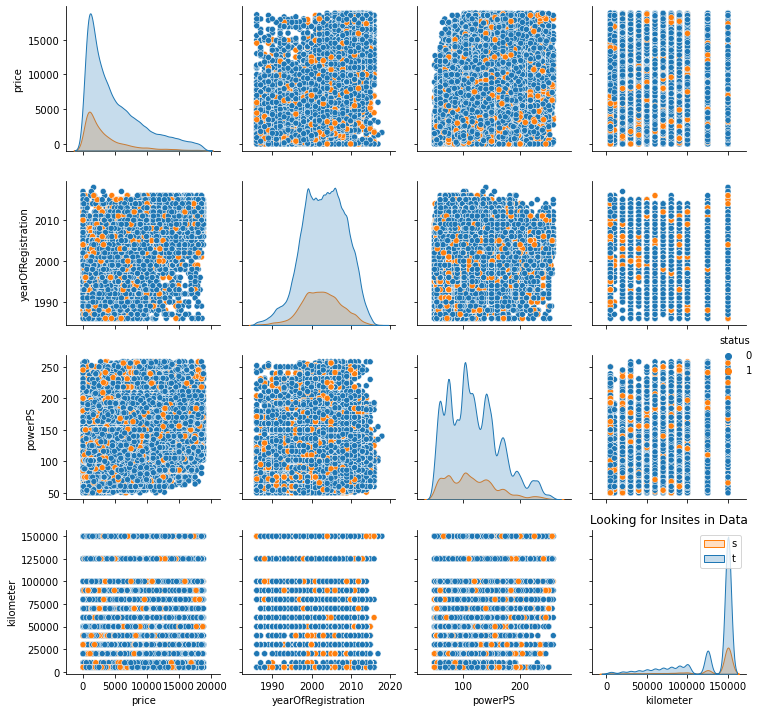

In [15]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="status")
plt.title("Looking for Insites in Data")
plt.legend("status")
plt.tight_layout()
plt.plot()

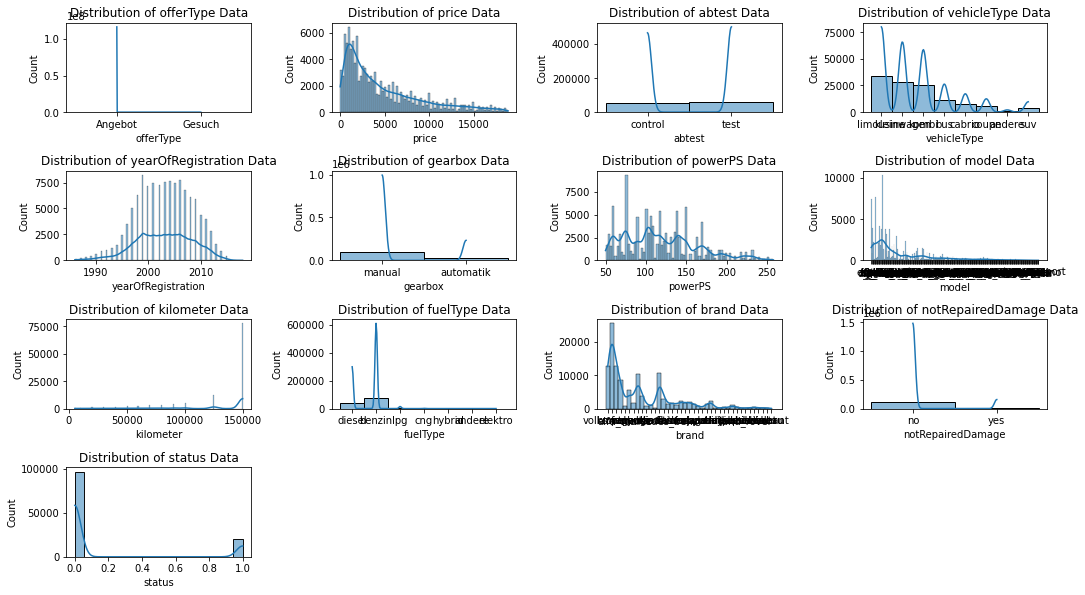

In [16]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(5,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

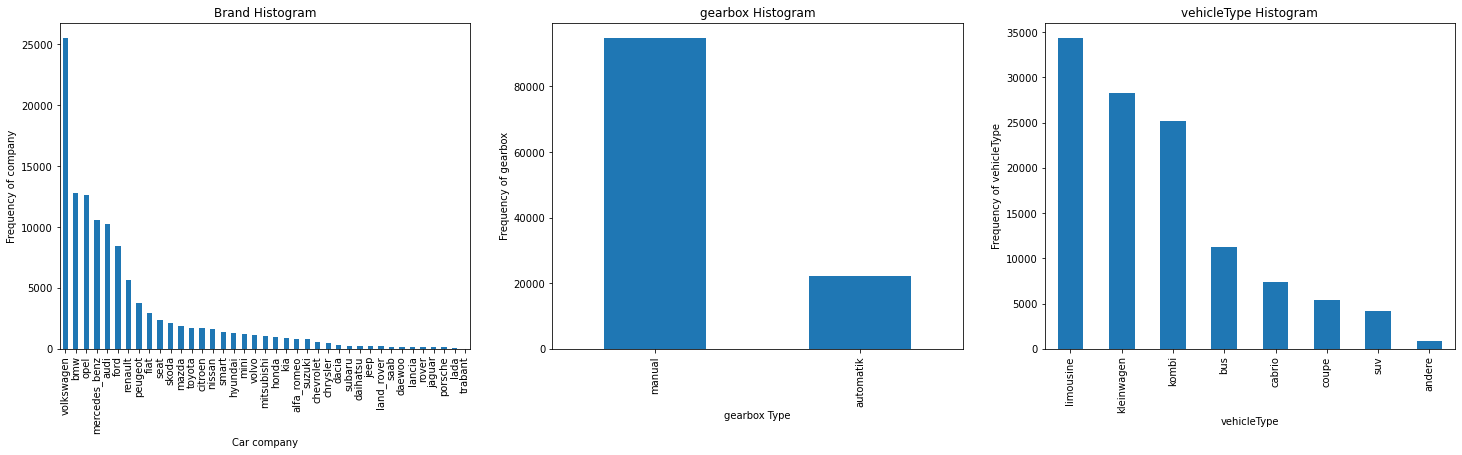

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.brand.value_counts().plot(kind = 'bar')
plt.title('Brand Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.gearbox.value_counts().plot(kind = 'bar')
plt.title('gearbox Histogram')
plt1.set(xlabel = 'gearbox Type', ylabel='Frequency of gearbox')

plt.subplot(1,3,3)
plt1 = df.vehicleType.value_counts().plot(kind = 'bar')
plt.title('vehicleType Histogram')
plt1.set(xlabel = 'vehicleType', ylabel='Frequency of vehicleType')

plt.show()

D:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



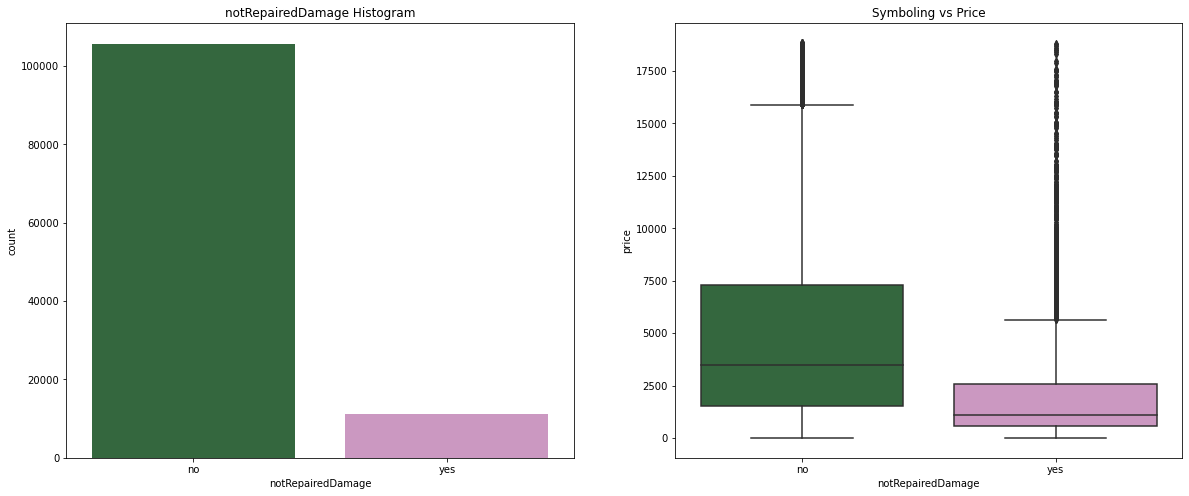

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('notRepairedDamage Histogram')
sns.countplot(df.notRepairedDamage, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.notRepairedDamage, y=df.price, palette=("cubehelix"))

plt.show()

<Figure size 1800x432 with 0 Axes>

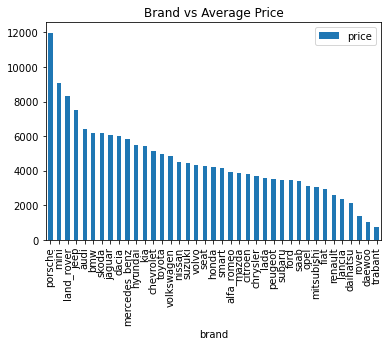

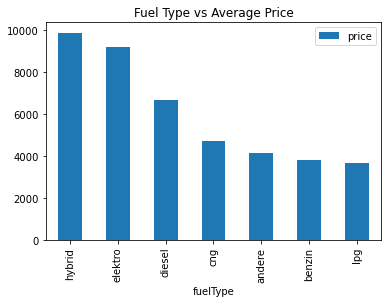

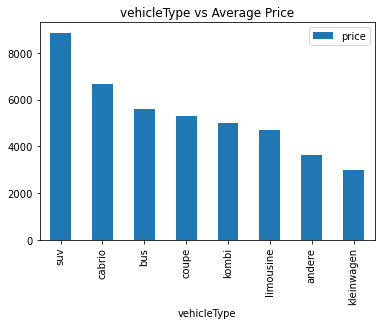

In [19]:
plt.figure(figsize=(25, 6))

df2 = pd.DataFrame(df.groupby(['brand'])['price'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Brand vs Average Price')
plt.show()

df3 = pd.DataFrame(df.groupby(['fuelType'])['price'].mean().sort_values(ascending = False))
df3.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df4 = pd.DataFrame(df.groupby(['vehicleType'])['price'].mean().sort_values(ascending = False))
df4.plot.bar()
plt.title('vehicleType vs Average Price')
plt.show()

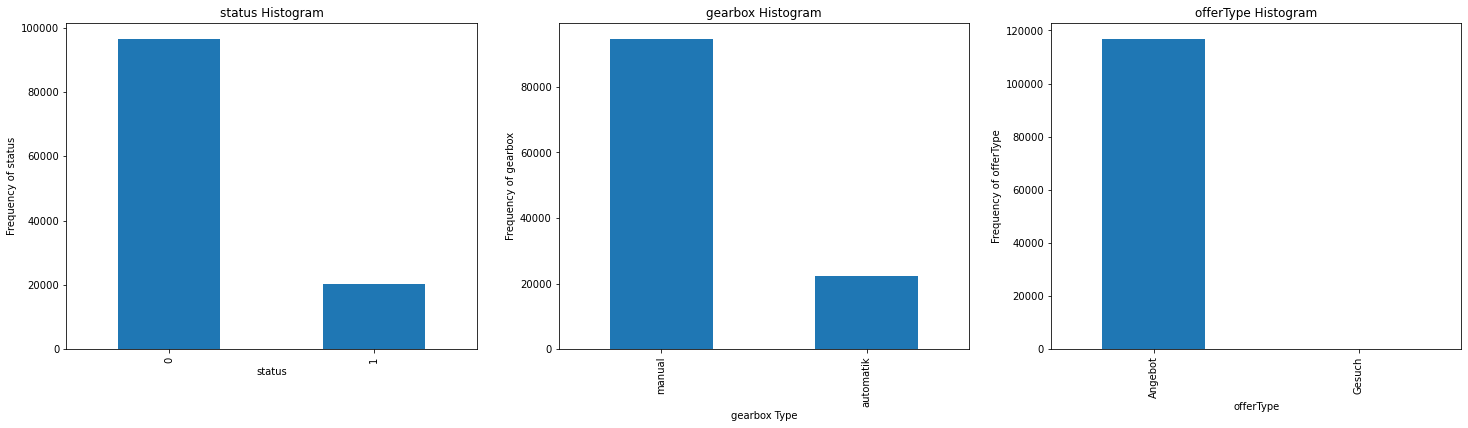

In [20]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.status.value_counts().plot(kind = 'bar')
plt.title('status Histogram')
plt1.set(xlabel = 'status', ylabel='Frequency of status')

plt.subplot(1,3,2)
plt1 = df.gearbox.value_counts().plot(kind = 'bar')
plt.title('gearbox Histogram')
plt1.set(xlabel = 'gearbox Type', ylabel='Frequency of gearbox')

plt.subplot(1,3,3)
plt1 = df.offerType.value_counts().plot(kind = 'bar')
plt.title('offerType Histogram')
plt1.set(xlabel = 'offerType', ylabel='Frequency of offerType')

plt.show()

In [21]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

offerType  price  abtest  vehicleType  yearOfRegistration  gearbox  \
0          0   1771       0            6                  20        1   
1          0    711       1            4                  13        1   
2          0    856       0            5                  18        1   
3          0   1450       0            5                  26        1   
4          0    334       1            4                  16        1   

   powerPS  model  kilometer  fuelType  brand  notRepairedDamage  status  
0      113     11          9         3      2                  0       0  
1        0    143          4         1     37                  0       0  
2       75     42         12         1     24                  0       0  
3       66    103         12         3     10                  0       0  
4       55      2         12         1      0                  0       0

In [22]:
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.head()

price  yearOfRegistration  powerPS  kilometer  status  offerType_Angebot  \
0  10499                2006      163      90000       0                  1   
1   2750                1999       50      40000       0                  1   
2   3500                2004      125     150000       0                  1   
3   7500                2012      116     150000       0                  1   
4   1050                2002      105     150000       0                  1   

   offerType_Gesuch  abtest_control  abtest_test  vehicleType_andere  ...  \
0                 0               1            0                   0  ...   
1                 0               0            1                   0  ...   
2                 0               1            0                   0  ...   
3                 0               1            0                   0  ...   
4                 0               0            1                   0  ...   

   brand_skoda  brand_smart  brand_subaru  brand_suzuki  brand_toyota  \
0            0            0             0             0             0   
1            0            0             0             0             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            0            0             0             0             0   

   brand_trabant  brand_volkswagen  brand_volvo  notRepairedDamage_no  \
0              0                 0            0                     1   
1              0                 1            0                     1   
2              0                 0            0                     1   
3              0                 0            0                     1   
4              0                 0            0                     1   

   notRepairedDamage_yes  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 311 columns]

# Non Tree Based Algorithms

In [23]:
X = df_nontree.iloc[:,df_nontree.columns != 'status']
y = df_nontree.status

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Logistic Regression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train_scaled, y_train)

D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [29]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 82.55034322333462


In [30]:
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 82.54027982075051


Text(0.5, 33.0, 'Predicted Values')

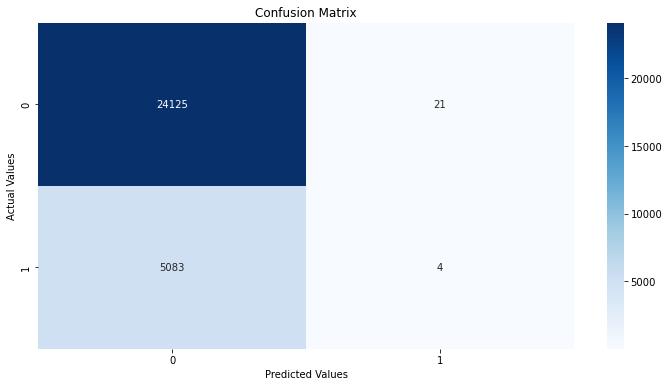

In [31]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
#plt.savefig('confusion_matrix.png')

In [32]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90     24146
           1       0.16      0.00      0.00      5087

    accuracy                           0.83     29233
   macro avg       0.49      0.50      0.45     29233
weighted avg       0.71      0.83      0.75     29233



# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred  =  classifier.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
y_test

48608    0
75149    0
33386    0
75488    0
64879    0
        ..
4115     0
21239    1
94376    0
70536    1
27906    0
Name: status, Length: 29233, dtype: int64

In [37]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [38]:
print(cm)
print(ac)
print(classification_report(y_test,y_pred))

[[24146     0]
 [ 5087     0]]
0.825984332774604
              precision    recall  f1-score   support

           0       0.83      1.00      0.90     24146
           1       0.00      0.00      0.00      5087

    accuracy                           0.83     29233
   macro avg       0.41      0.50      0.45     29233
weighted avg       0.68      0.83      0.75     29233



D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(0.5, 33.0, 'Predicted Values')

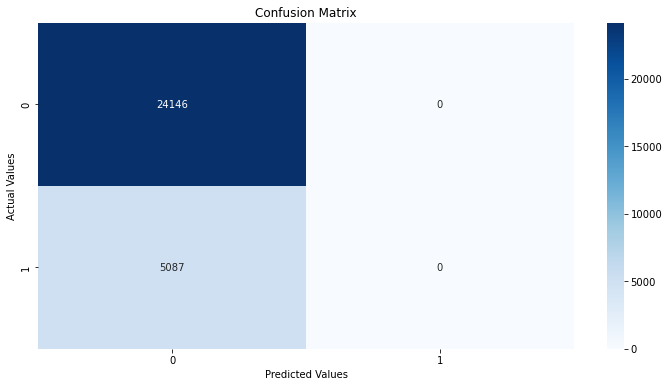

In [39]:
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
#plt.savefig('confusion_matrix.png')

# SVM

In [40]:
from sklearn.svm import SVC

In [41]:
#clf=SVC(kernel="linear")
#clf.fit(X_train,y_train)
#y_pred=clf.predict(X_test)

In [42]:
#cm = confusion_matrix(y_test, y_pred)
#ac = accuracy_score(y_test,y_pred)

In [43]:
#clf=SVC(kernel="sigmoid")
#clf.fit(X_train,y_train)
#y_pred=clf.predict(X_test)

In [44]:
#cm = confusion_matrix(y_test, y_pred)
#ac = accuracy_score(y_test,y_pred)

In [45]:
#clf=SVC(kernel="rfb")
#clf.fit(X_train,y_train)
#y_pred=clf.predict(X_test)

In [46]:
#cm = confusion_matrix(y_test, y_pred)
#ac = accuracy_score(y_test,y_pred)

In [47]:
#clf=SVC(kernel="poly")
#clf.fit(X_train,y_train)
#y_pred=clf.predict(X_test)

In [48]:
#cm = confusion_matrix(y_test, y_pred)
#ac = accuracy_score(y_test,y_pred)

# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
clf=KNeighborsClassifier(n_neighbors=32)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [52]:
print(cm)
print(ac)
print(classification_report(y_test,y_pred))

[[24105    41]
 [ 5042    45]]
0.8261211644374509
              precision    recall  f1-score   support

           0       0.83      1.00      0.90     24146
           1       0.52      0.01      0.02      5087

    accuracy                           0.83     29233
   macro avg       0.68      0.50      0.46     29233
weighted avg       0.77      0.83      0.75     29233



# Tree Based Algorithm

In [53]:
target = "status"
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [54]:
X = df_tree.iloc[:,df_tree.columns != 'status']
y = df_tree.status

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

# Desicion Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [58]:
print(cm)
print(ac)
print(classification_report(y_test,y_pred))

[[20366  3780]
 [ 3608  1479]]
0.7472719187219923
              precision    recall  f1-score   support

           0       0.85      0.84      0.85     24146
           1       0.28      0.29      0.29      5087

    accuracy                           0.75     29233
   macro avg       0.57      0.57      0.57     29233
weighted avg       0.75      0.75      0.75     29233



In [60]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 1032.50
|   |--- feature_9 <= 1.50
|   |   |--- feature_1 <= 501.50
|   |   |   |--- feature_4 <= 12.50
|   |   |   |   |--- feature_1 <= 264.50
|   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 210.50
|   |   |   |   |   |   |   |--- feature_7 <= 21.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 97.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 142.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 49.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  49.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |--- feature_1 >  142.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  11.50
|   |   |   |   |   |   

In [61]:
#import graphviz
#from sklearn import tree

#dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_col_tree,  class_names=target, filled=True)

#graph = graphviz.Source(dot_data, format="png") 
#graph

In [62]:
#from dtreeviz.trees import dtreeviz # remember to load the package

#viz = dtreeviz(clf, X, y,target_name= target, feature_names=feature_col_tree, class_names=target)

#viz

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [66]:
print(cm)
print(ac)
print(classification_report(y_test,y_pred))

[[23304   842]
 [ 4320   767]]
0.8234187390962269
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     24146
           1       0.48      0.15      0.23      5087

    accuracy                           0.82     29233
   macro avg       0.66      0.56      0.56     29233
weighted avg       0.78      0.82      0.78     29233



# XGBoost

In [67]:
from xgboost import XGBClassifier

In [68]:
clf=XGBClassifier(use_label_encoder=False)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

[21:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [71]:
print(cm)
print(ac)
print(classification_report(y_test,y_pred))

[[23933   213]
 [ 4694   393]]
0.8321417576027093
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24146
           1       0.65      0.08      0.14      5087

    accuracy                           0.83     29233
   macro avg       0.74      0.53      0.52     29233
weighted avg       0.80      0.83      0.77     29233



Conclusion: If the intention is identifiying if a car will be sold (True Positives) I would choose between Random Forest an Desicion Tree Algorithm.